/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:95: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:113: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/Users/vincent/Desktop/RA/chimeric-tools/src/chimeric_tools/Data.py:131: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(stream, compression="gzip")
/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_74293/176025628.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

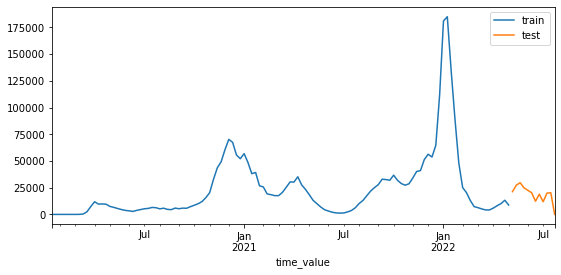

In [3]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from chimeric_tools.Data import covid_data

pa_data = covid_data(geo_values=["42"])
data = pa_data
data['time_value'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

data = data.set_index("time_value")
data = data.asfreq('W')
data = data.sort_index()
data
# data['time_value'] = pd.to_datetime(data['time_value'], format='%Y-%m-%d')

# data = data.set_index("time_value")
# data = data.asfreq('D')
# data = data.sort_index()
# data

# Split train-test
# ==============================================================================
# use last 12 weeks as test
steps = 12
data_train = data[:-steps]
data_test  = data[-steps:]

# Plot
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['cases'].plot(ax=ax, label='train')
data_test['cases'].plot(ax=ax, label='test')
ax.legend()

In [50]:
pa_data

,location,location_name,date,end_date,EW,cases,preds_cases,residuals_cases,deaths,preds_deaths,residuals_deaths,hosps,preds_hosps,residuals_hosps,time_value
273768,42,Pennsylvania,2020-01-19,2020-01-25,202004,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,2020-01-19
273769,42,Pennsylvania,2020-01-26,2020-02-01,202005,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,2020-01-26
273770,42,Pennsylvania,2020-02-02,2020-02-08,202006,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,2020-02-02
273771,42,Pennsylvania,2020-02-09,2020-02-15,202007,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,2020-02-09
273772,42,Pennsylvania,2020-02-16,2020-02-22,202008,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.000000,2020-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273895,42,Pennsylvania,2022-06-26,2022-07-02,202226,18900,6402.514796,12497.485204,109,70.233955,38.766045,18900,6402.514796,12497.485204,2022-06-26
273896,42,Pennsylvania,2022-07-03,2022-07-09,202227,11872,28167.106801,-16295.106801,55,84.951417,-29.951417,11872,28167.106801,-16295.106801,2022-07-03
273897,42,Pennsylvania,2022-07-10,2022-07-16,202228,19947,2822.433237,17124.566763,128,59.196377,68.803623,19947,2822.433237,17124.566763,2022-07-10
273898,42,Pennsylvania,2022-07-17,2022-07-23,202229,20240,30111.348673,-9871.348673,98,119.066987,-21.066987,20240,30111.348673,-9871.348673,2022-07-17


In [4]:
# Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoregMultiOutput(
                    regressor = Ridge(),
                    steps     = steps,
                    lags      = 15
                )

forecaster.fit(y=data_train['cases'])
forecaster

# Predict
# ==============================================================================
predictions = forecaster.predict(steps=steps)
# predictions_train = forecaster.predict(data=data_train['value'])

In [7]:
predictions

2022-05-08    -1339.816864
2022-05-15    -7705.802732
2022-05-22   -20292.775283
2022-05-29   -35439.643155
2022-06-05   -45758.941072
2022-06-12   -58032.568764
2022-06-19   -61291.809812
2022-06-26   -57091.760868
2022-07-03   -52981.612848
2022-07-10   -45881.012902
2022-07-17   -32104.815958
2022-07-24   -19144.292755
Freq: W-SUN, Name: pred, dtype: float64

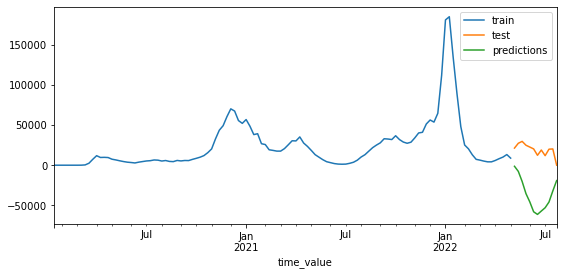

In [6]:
# Plot predictions
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_train['cases'].plot(ax=ax, label='train')
data_test['cases'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [94]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
#  Create and fit forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = Ridge(),
                lags      = 15
             )
forecaster.fit(y=data_train['cases'])
# Prediction intervals
# ==============================================================================
predictions = forecaster.predict_interval(
                    steps    = steps,
                    interval = [5, 95],
                    n_boot   = 500
              )

predictions.head(4)


,pred,lower_bound,upper_bound
2022-05-08,3514.771349,-5656.450012,18038.167243
2022-05-15,6000.257618,-16169.121524,32809.799046
2022-05-22,12126.168150,-22285.318984,46878.504064
2022-05-29,17307.849761,-19336.716839,69343.846295


In [104]:
miu_list = forecaster.predict(steps=steps).values
ppf = []
quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]
for i in range(steps):
    ppf.append(norm.ppf(quantial,miu_list[i],213))

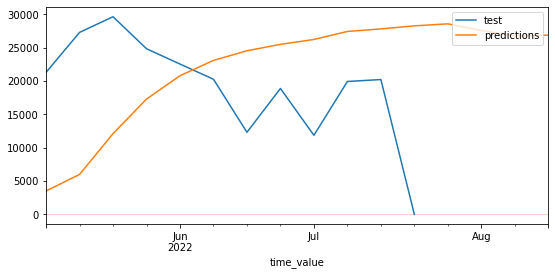

In [19]:
# Plot predictions and interval
# ==============================================================================
fig, ax=plt.subplots(figsize=(9, 4))
data_test['cases'].plot(ax=ax, label='test')
predictions['pred'].plot(ax=ax, label='predictions')
ax.fill_between(
    predictions.index,
    predictions['lower_bound']>=0,
    # predictions['upper_bound'],
    color = 'red',
    alpha = 0.2,
    # label = 'prediction_interval'
)
ax.legend(loc='upper right')

In [42]:
predictions['pred']

2022-05-08     3514.771349
2022-05-15     6000.257618
2022-05-22    12126.168150
2022-05-29    17307.849761
2022-06-05    20815.677514
2022-06-12    23111.401783
2022-06-19    24555.501112
2022-06-26    25520.207724
2022-07-03    26252.281544
2022-07-10    27455.276366
2022-07-17    27837.836033
2022-07-24    28296.679763
2022-07-31    28598.314964
2022-08-07    27599.015745
2022-08-14    26791.685281
2022-08-21    26905.177321
Freq: W-SUN, Name: pred, dtype: float64

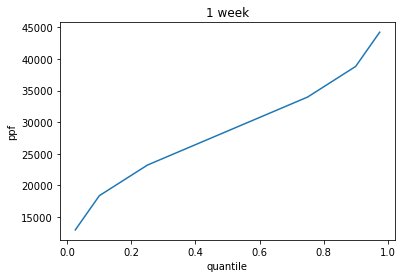

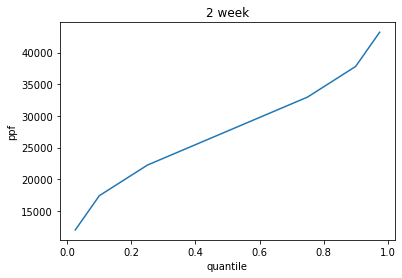

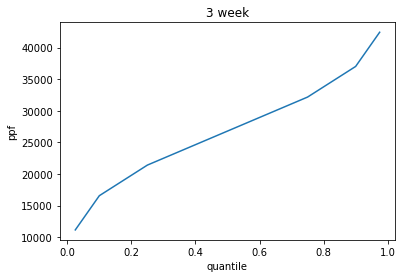

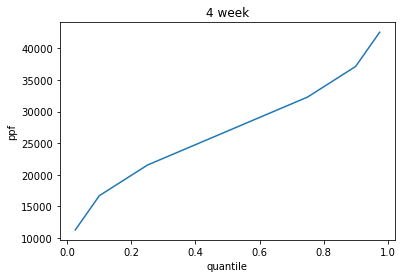

In [31]:
from scipy.stats import norm
def cal_miu(prediction,test):
    pair = np.array(list(zip(prediction,test)))
    sigma = np.std(pair)
    return sigma
def get_quantile(quantial,predicion,sigma):
    qutial = quantial
    miu_1week = predicion[0]
    miu_2week = predicion[1]
    miu_3week = predicion[2]
    miu_4week = predicion[3]
    ppf_list_1week = norm.ppf(qutial,miu_1week,sigma)
    ppf_list_2week = norm.ppf(qutial,miu_2week,sigma)
    ppf_list_3week = norm.ppf(qutial,miu_3week,sigma)
    ppf_list_4week = norm.ppf(qutial,miu_4week,sigma)
    return ppf_list_1week,ppf_list_2week,ppf_list_3week,ppf_list_4week

def plot_quantial(quantial,ppf_list,weeks):
    plt.plot(quantial,ppf_list)
    plt.xlabel('quantile')
    plt.ylabel('ppf')
    plt.title(weeks+' week')
    plt.show()
quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]
sigma = (cal_miu(predictions['pred'][:-4],data_test['cases']))
ppf_list_4weeks = get_quantile(quantial,predictions['pred'][-4:],sigma)
plot_quantial(quantial,ppf_list_4weeks[0],'1')
plot_quantial(quantial,ppf_list_4weeks[1],'2')
plot_quantial(quantial,ppf_list_4weeks[2],'3')
plot_quantial(quantial,ppf_list_4weeks[3],'4')

In [51]:
data_test

,location,location_name,date,end_date,EW,cases,preds_cases,residuals_cases,deaths,preds_deaths,residuals_deaths,hosps,preds_hosps,residuals_hosps
time_value,,,,,,,,,,,,,,
2022-05-08,42,Pennsylvania,2022-05-08,2022-05-14,202219,21316,3558.498261,17757.501739,81,42.221332,38.778668,21316,3558.498261,17757.501739
2022-05-15,42,Pennsylvania,2022-05-15,2022-05-21,202220,27317,34190.987484,-6873.987484,84,77.786905,6.213095,27317,34190.987484,-6873.987484
2022-05-22,42,Pennsylvania,2022-05-22,2022-05-28,202221,29664,26994.141910,2669.858090,249,91.894715,157.105285,29664,26994.141910,2669.858090
2022-05-29,42,Pennsylvania,2022-05-29,2022-06-04,202222,24862,29045.034912,-4183.034912,107,266.766771,-159.766771,24862,29045.034912,-4183.034912
2022-06-05,42,Pennsylvania,2022-06-05,2022-06-11,202223,22564,19631.509771,2932.490229,159,142.575846,16.424154,22564,19631.509771,2932.490229
2022-06-12,42,Pennsylvania,2022-06-12,2022-06-18,202224,20281,22693.068863,-2412.068863,167,121.211053,45.788947,20281,22693.068863,-2412.068863
2022-06-19,42,Pennsylvania,2022-06-19,2022-06-25,202225,12326,19310.802836,-6984.802836,77,183.600807,-106.600807,12326,19310.802836,-6984.802836
2022-06-26,42,Pennsylvania,2022-06-26,2022-07-02,202226,18900,6402.514796,12497.485204,109,70.233955,38.766045,18900,6402.514796,12497.485204
2022-07-03,42,Pennsylvania,2022-07-03,2022-07-09,202227,11872,28167.106801,-16295.106801,55,84.951417,-29.951417,11872,28167.106801,-16295.106801


In [74]:
location = data_test['location'].iloc[0]
forecaster_date = data_test['date'].iloc[-1]
location,forecaster_date
target_end_date = forecaster_date
quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]

In [92]:
for idx,ppf in enumerate(ppf_list_4weeks):
    print(idx)

0
1
2
3


In [93]:
output = pd.DataFrame(columns=['forecast_date','target','target_end_date','location','type','quantile','value'])
for idx,ppf in enumerate(ppf_list_4weeks):
    quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]
    for q,p in zip(quantial,ppf):
        forecaster_date = forecaster_date
        location = location
        target = str(idx+1) +" wk ahead inc case"
        target_end_date = data_test['date'].iloc[-1]+pd.Timedelta(weeks=i)
        type = "point"
        quantial = q
        value = p
        output = output.append({'forecast_date':forecaster_date,'target':target,'target_end_date':target_end_date,'location':location,'type':type,'quantile':quantial,'value':value},ignore_index=True)
output.to_csv('output.csv',index=False)
    
    

/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_74293/1330073676.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'forecast_date':forecaster_date,'target':target,'target_end_date':target_end_date,'location':location,'type':type,'quantile':quantial,'value':value},ignore_index=True)
/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_74293/1330073676.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output = output.append({'forecast_date':forecaster_date,'target':target,'target_end_date':target_end_date,'location':location,'type':type,'quantile':quantial,'value':value},ignore_index=True)
/var/folders/01/z1m0rbnx48jf6lx1g61vx93m0000gp/T/ipykernel_74293/1330073676.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

In [88]:
output = output.groupby("target_end_date")


In [89]:
for i,sub in output:
    print(i,sub)

2022-07-31     forecast_date               target target_end_date location   type  \
0      2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
4      2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
8      2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
12     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
16     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
20     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
24     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
28     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
32     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
36     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
40     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
44     2022-07-24  1 wk ahead inc case      2022-07-31       42  point   
48     2022-07-24  1 wk ahe

In [83]:
for ppf in ppf_list_4weeks:
    print(ppf)
    for q,p in zip(quantial,ppf):
        print(q,p)

[12969.32080698 18379.06497369 23219.85064102 28598.31496369
 33976.77928637 38817.5649537  44227.30912041]


TypeError: 'float' object is not iterable

In [78]:
quantial = [0.025,0.100,0.250,0.500,0.750,0.900,0.975]

In [79]:
for q,p in zip(quantial,ppf_list_4weeks):
    print(q,p)

0.025 [12969.32080698 18379.06497369 23219.85064102 28598.31496369
 33976.77928637 38817.5649537  44227.30912041]
0.1 [11970.02158854 17379.76575525 22220.55142258 27599.01574525
 32977.48006793 37818.26573526 43228.00990197]
0.25 [11162.69112448 16572.43529119 21413.22095852 26791.68528119
 32170.14960387 37010.9352712  42420.67943791]
0.5 [11276.1831638  16685.9273305  21526.71299784 26905.17732051
 32283.64164319 37124.42731052 42534.17147723]


In [ ]:
true = covid_data('2022-07-24','2022-08-21',geo_values=["42"])